In [1]:
import os, fnmatch
import numpy as np
from scipy.integrate import odeint
import netwin as nw
import torch 
import sbi.utils as utils
from sbi.inference.base import infer
import matplotlib.pyplot as plt

In [2]:
result =[]
path = '/home/chaggar/Documents/Network_Inference/subjects/'
for root, dirs, files in os.walk(path):
    for name in files:
        if fnmatch.fnmatch(name, 'fdt_network_matrix'):
            result.append(os.path.join(root, name))

# %%
A_all = np.ones((83,83,10))
for i, j in enumerate(result):
    A_all[:,:,i] = np.genfromtxt(j)
# %%
A = np.mean(A_all,axis=2)

A = A / np.max(A)

In [3]:
m = nw.NetworkFKPP(A)

In [11]:
p = np.zeros([83]) + 1e-5
mask = [25, 26, 39, 40, 66, 67, 80, 81]
p[mask] = 0.1

k = 2
a = 5

m.t = np.linspace(0,1,100)

u0 = np.append(np.log(p), np.log([k, a]))

sim = m.forward(u0)

In [12]:
def flat_model(u0): 
    sim = m.forward(u0)
    return sim.T.flatten()

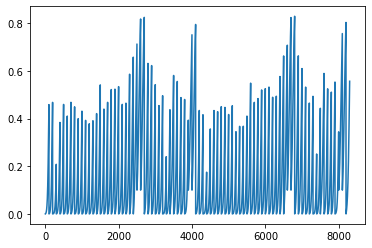

In [13]:
sim = flat_model(u0)
data = sim + np.random.rand(len(sim))/100
plt.plot(sim)

In [19]:
dims = 85
prior = utils.BoxUniform(low=-5*torch.ones(dims)), high=5*torch.ones(dims))

SyntaxError: invalid syntax (<ipython-input-19-4137edaee4b9>, line 2)

In [ ]:
posterior = infer(flat_model, prior, 'SNPE', num_simulations=10, num_workers=4)

In [ ]:
posterior_samples = posterior.sample((10000,), x=data)